ЗАДАНИЕ 1: ИССЛЕДОВАНИЕ ДАННЫХ

ОСНОВНАЯ ИНФОРМАЦИЯ:
   • Размер данных: (569, 30)
   • Количество признаков: 30
   • Количество объектов: 569
   • Примеры признаков: ['mean radius', 'mean texture', 'mean perimeter']...

ЦЕЛЕВАЯ ПЕРЕМЕННАЯ (target):
   • Уникальные значения: [0 1]
   • Распределение классов:
     Класс 0: 212 объектов
     Класс 1: 357 объектов

КАЧЕСТВО ДАННЫХ:
   • Пропущенные значения: 0
   • Дубликаты: 0

СТАТИСТИЧЕСКОЕ ОПИСАНИЕ (первые 5 признаков):
       mean radius  mean texture  mean perimeter    mean area  mean smoothness
count   569.000000    569.000000      569.000000   569.000000       569.000000
mean     14.127292     19.289649       91.969033   654.889104         0.096360
std       3.524049      4.301036       24.298981   351.914129         0.014064
min       6.981000      9.710000       43.790000   143.500000         0.052630
25%      11.700000     16.170000       75.170000   420.300000         0.086370
50%      13.370000     18.840000       86.240000  

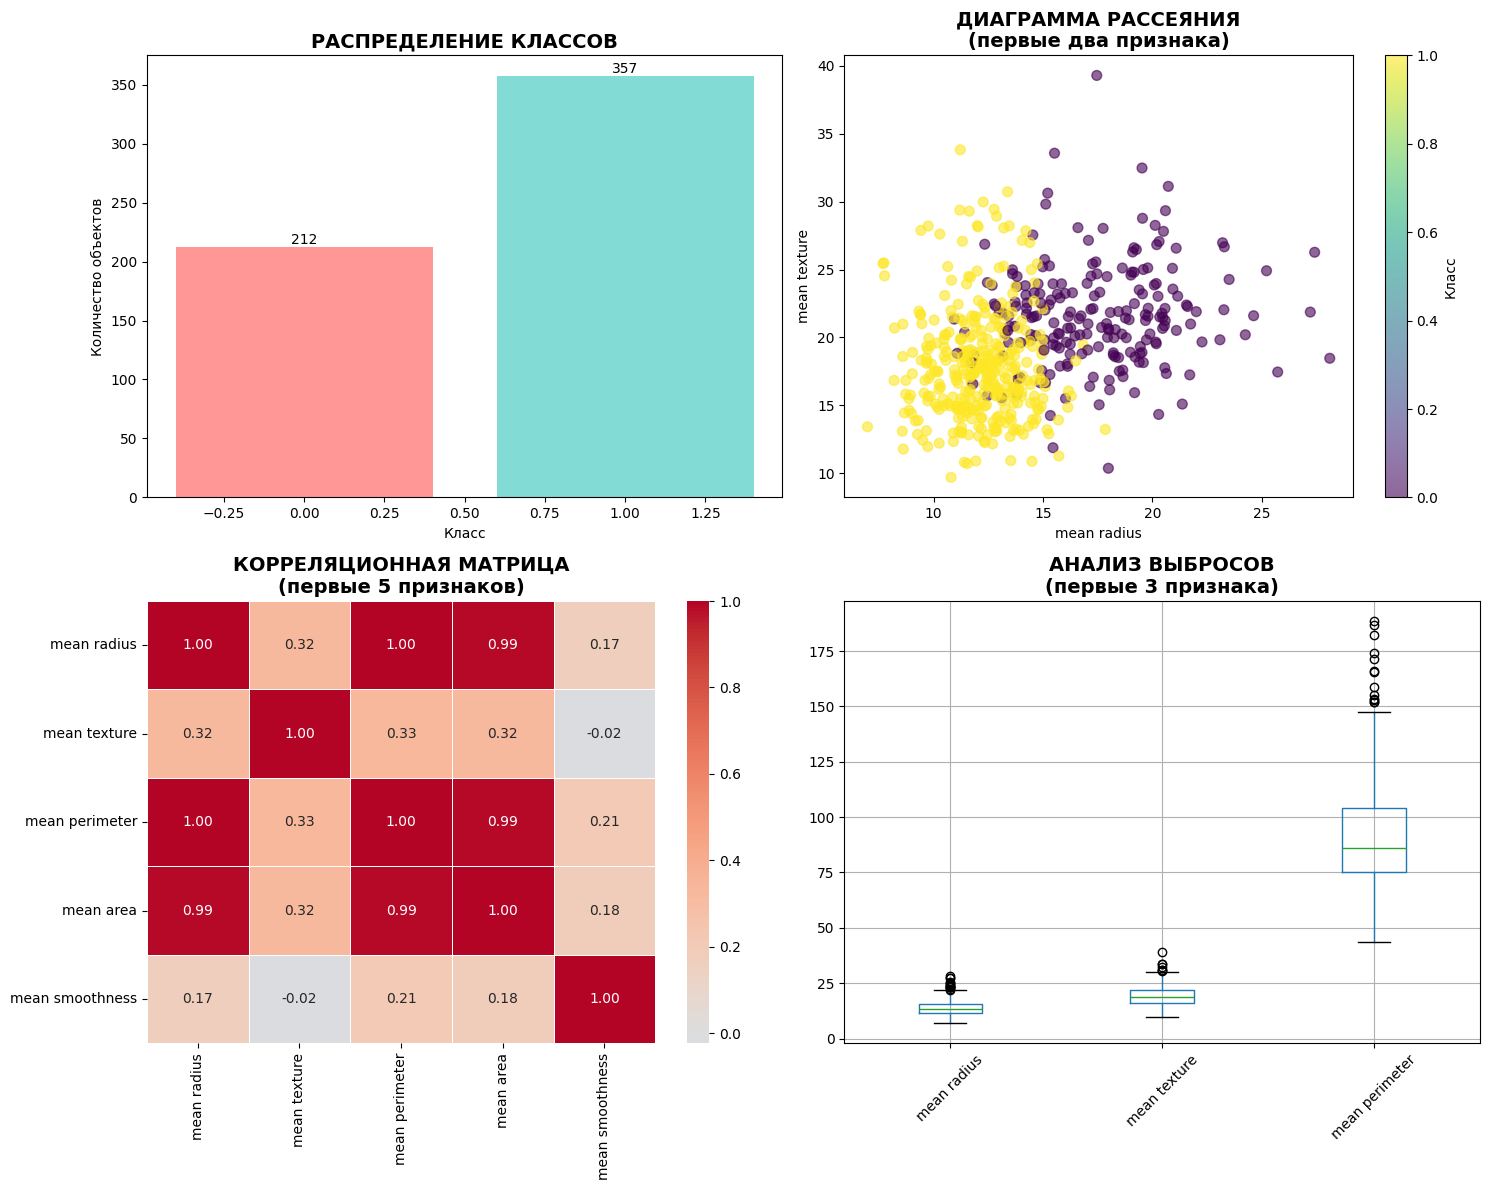


ЗАДАНИЕ 2: ОБУЧЕНИЕ МОДЕЛИ МАШИННОГО ОБУЧЕНИЯ

РАЗДЕЛЕНИЕ ДАННЫХ:
   • Обучающая выборка: 426 объектов
   • Тестовая выборка: 143 объектов
   • Соотношение: 75% / 25%

ВЫБОР МОДЕЛИ:
   • Выбрана модель: Логистическая регрессия

ОБОСНОВАНИЕ ВЫБОРА МОДЕЛИ:
   • [ПРИЧИНА 1: Например, модель хорошо интерпретируется]
   • [ПРИЧИНА 2: Быстрое обучение и предсказание]
   • [ПРИЧИНА 3: Хорошо работает на данных этого типа]
   СОВЕТ: Опишите 2-3 конкретные причины выбора!

ОБУЧЕНИЕ МОДЕЛИ...
   • Модель успешно обучена!

РЕЗУЛЬТАТЫ ОЦЕНКИ:
   • Точность (Accuracy): 0.9860
   • Процент правильных ответов: 98.60%

ДЕТАЛЬНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ:
              precision    recall  f1-score   support

           0     0.9811    0.9811    0.9811        53
           1     0.9889    0.9889    0.9889        90

    accuracy                         0.9860       143
   macro avg     0.9850    0.9850    0.9850       143
weighted avg     0.9860    0.9860    0.9860       143



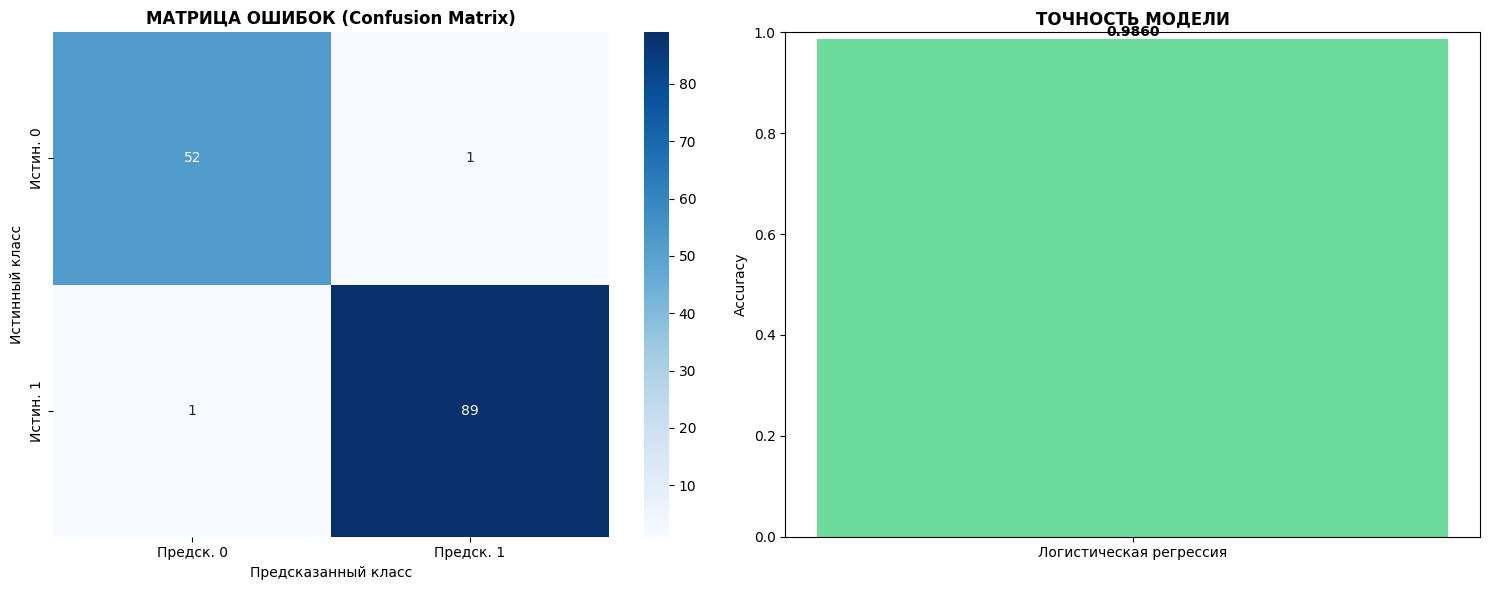


АНАЛИЗ УСПЕШНО ЗАВЕРШЕН!
Итоговая точность модели: 0.9860 (98.60%)
Размер исходных данных: (569, 30)
Использованная модель: Pipeline


In [5]:
import pandas as pd                                                                  # Для работы с таблицами данных
import numpy as np                                                                   # Для математических операций
import matplotlib.pyplot as plt                                                      # Для построения графиков
import seaborn as sns                                                                # Для красивых визуализаций
from sklearn.model_selection import train_test_split                                 # Для разделения данных
from sklearn.preprocessing import StandardScaler                                     # Для нормализации данных
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Метрики качества

# ФУНКЦИЯ ДЛЯ ИССЛЕДОВАНИЯ ДАННЫХ
# =============================================================================
def explore_dataset(dataset):
    """
    АНАЛИЗИРУЕТ ДАННЫЕ И ВЫВОДИТ ОСНОВНУЮ ИНФОРМАЦИЮ
    Параметры:
        dataset - загруженный датасет из sklearn
    Возвращает:
        X - признаки, y - целевая переменная, data - исходные данные
    """
    # Загрузка данных в удобный формат pandas
    data = dataset
    X = pd.DataFrame(data.data, columns=data.feature_names)  # Признаки как таблица
    y = pd.Series(data.target, name="target")               # Целевая переменная

    print("=" * 60)
    print("ЗАДАНИЕ 1: ИССЛЕДОВАНИЕ ДАННЫХ")
    print("=" * 60)

    # БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ
    print("\nОСНОВНАЯ ИНФОРМАЦИЯ:")
    print(f"   • Размер данных: {X.shape}")
    print(f"   • Количество признаков: {X.shape[1]}")
    print(f"   • Количество объектов: {X.shape[0]}")
    print(f"   • Примеры признаков: {list(X.columns[:3])}...")  # Показываем только первые 3

    # ИНФОРМАЦИЯ О ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
    print(f"\nЦЕЛЕВАЯ ПЕРЕМЕННАЯ (target):")
    print(f"   • Уникальные значения: {np.unique(y)}")
    print(f"   • Распределение классов:")
    class_distribution = y.value_counts().sort_index()
    for class_idx, count in class_distribution.items():
        print(f"     Класс {class_idx}: {count} объектов")

    # ПРОВЕРКА КАЧЕСТВА ДАННЫХ
    print(f"\nКАЧЕСТВО ДАННЫХ:")
    print(f"   • Пропущенные значения: {X.isna().sum().sum()}")
    print(f"   • Дубликаты: {X.duplicated().sum()}")

    # СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ
    print(f"\nСТАТИСТИЧЕСКОЕ ОПИСАНИЕ (первые 5 признаков):")
    print(X.describe().iloc[:, :5])  # Показываем статистику по первым 5 признакам

    return X, y, data

# ФУНКЦИЯ ДЛЯ ВИЗУАЛИЗАЦИИ ДАННЫХ
# =============================================================================
def visualize_data(X, y):
    """
    СОЗДАЕТ РАЗЛИЧНЫЕ ГРАФИКИ ДЛЯ АНАЛИЗА ДАННЫХ
    Параметры:
        X - матрица признаков
        y - вектор целевых значений
    """
    print("\nВИЗУАЛИЗАЦИЯ ДАННЫХ:")

    # Создаем сетку графиков 2x2
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. РАСПРЕДЕЛЕНИЕ КЛАССОВ
    class_counts = y.value_counts().sort_index()
    bars = axes[0, 0].bar(class_counts.index, class_counts.values,
                         color=['#ff6b6b', '#4ecdc4'], alpha=0.7)
    axes[0, 0].set_title('РАСПРЕДЕЛЕНИЕ КЛАССОВ', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Класс')
    axes[0, 0].set_ylabel('Количество объектов')
    # Добавляем подписи значений на столбцах
    for bar in bars:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom')

    # 2. ДИАГРАММА РАССЕЯНИЯ (если есть минимум 2 признака)
    if X.shape[1] >= 2:
        scatter = axes[0, 1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y,
                                   cmap='viridis', alpha=0.6, s=50)
        axes[0, 1].set_title('ДИАГРАММА РАССЕЯНИЯ\n(первые два признака)',
                            fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel(X.columns[0])
        axes[0, 1].set_ylabel(X.columns[1])
        plt.colorbar(scatter, ax=axes[0, 1], label='Класс')

    # 3. КОРРЕЛЯЦИОННАЯ МАТРИЦА (первые 5 признаков)
    if X.shape[1] >= 5:
        corr_matrix = X.iloc[:, :5].corr()
        sns.heatmap(corr_matrix, ax=axes[1, 0], annot=True, cmap='coolwarm',
                   center=0, fmt='.2f', linewidths=0.5)
        axes[1, 0].set_title('КОРРЕЛЯЦИОННАЯ МАТРИЦА\n(первые 5 признаков)',
                            fontsize=14, fontweight='bold')

    # 4. BOXPLOT ДЛЯ АНАЛИЗА ВЫБРОСОВ
    if X.shape[1] >= 3:
        X.iloc[:, :3].boxplot(ax=axes[1, 1])
        axes[1, 1].set_title('АНАЛИЗ ВЫБРОСОВ\n(первые 3 признака)',
                           fontsize=14, fontweight='bold')
        axes[1, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# ФУНКЦИЯ ДЛЯ ОБУЧЕНИЯ И ОЦЕНКИ МОДЕЛИ
# =============================================================================
def train_and_evaluate_model(X, y, model_type='logistic'):
    """
    ОБУЧАЕТ МОДЕЛЬ И ОЦЕНИВАЕТ ЕЁ КАЧЕСТВО
    Параметры:
        X - признаки
        y - целевая переменная
        model_type - тип модели ('logistic', 'random_forest', 'knn')
    Возвращает:
        model - обученная модель
        accuracy - точность на тестовой выборке
    """
    print("\n" + "=" * 60)
    print("ЗАДАНИЕ 2: ОБУЧЕНИЕ МОДЕЛИ МАШИННОГО ОБУЧЕНИЯ")
    print("=" * 60)

    # РАЗДЕЛЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ
    print("\nРАЗДЕЛЕНИЕ ДАННЫХ:")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )
    print(f"   • Обучающая выборка: {X_train.shape[0]} объектов")
    print(f"   • Тестовая выборка: {X_test.shape[0]} объектов")
    print(f"   • Соотношение: 75% / 25%")

    # ВЫБОР И НАСТРОЙКА МОДЕЛИ
    print(f"\nВЫБОР МОДЕЛИ:")

    if model_type == 'logistic':
        from sklearn.linear_model import LogisticRegression
        from sklearn.pipeline import Pipeline

        model = Pipeline([
            ("scaler", StandardScaler()),  # Нормализация данных
            ("clf", LogisticRegression(random_state=42, max_iter=1000))  # Логистическая регрессия
        ])
        model_name = "Логистическая регрессия"

    elif model_type == 'random_forest':
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model_name = "Случайный лес"

    elif model_type == 'knn':
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.pipeline import Pipeline

        model = Pipeline([
            ("scaler", StandardScaler()),  # Важно для KNN
            ("clf", KNeighborsClassifier(n_neighbors=5))
        ])
        model_name = "K-ближайших соседей (KNN)"

    else:
        raise ValueError("Неизвестный тип модели")

    print(f"   • Выбрана модель: {model_name}")

    # ОБОСНОВАНИЕ ВЫБОРА МОДЕЛИ (ЭТОТ РАЗДЕЛ ЗАПОЛНИТЕ САМОСТОЯТЕЛЬНО!)
    print(f"\nОБОСНОВАНИЕ ВЫБОРА МОДЕЛИ:")
    print("   • [ПРИЧИНА 1: Например, модель хорошо интерпретируется]")
    print("   • [ПРИЧИНА 2: Быстрое обучение и предсказание]")
    print("   • [ПРИЧИНА 3: Хорошо работает на данных этого типа]")
    print("   СОВЕТ: Опишите 2-3 конкретные причины выбора!")

    # ОБУЧЕНИЕ МОДЕЛИ
    print(f"\nОБУЧЕНИЕ МОДЕЛИ...")
    model.fit(X_train, y_train)
    print("   • Модель успешно обучена!")

    # ПРЕДСКАЗАНИЯ И ОЦЕНКА КАЧЕСТВА
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\nРЕЗУЛЬТАТЫ ОЦЕНКИ:")
    print(f"   • Точность (Accuracy): {accuracy:.4f}")
    print(f"   • Процент правильных ответов: {accuracy*100:.2f}%")

    # ПОДРОБНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ
    print(f"\nДЕТАЛЬНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ:")
    print(classification_report(y_test, y_pred, digits=4))

    # ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # 1. МАТРИЦА ОШИБОК
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[0], cmap='Blues',
                xticklabels=['Предск. 0', 'Предск. 1'],
                yticklabels=['Истин. 0', 'Истин. 1'])
    axes[0].set_title('МАТРИЦА ОШИБОК (Confusion Matrix)', fontweight='bold')
    axes[0].set_xlabel('Предсказанный класс')
    axes[0].set_ylabel('Истинный класс')

    # 2. ГРАФИК ТОЧНОСТИ
    models = [model_name]
    accuracies = [accuracy]
    bars = axes[1].bar(models, accuracies, color=['#2ecc71'], alpha=0.7)
    axes[1].set_title('ТОЧНОСТЬ МОДЕЛИ', fontweight='bold')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_ylim(0, 1)
    # Добавляем значения на столбцы
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    return model, accuracy

# ГЛАВНАЯ ФУНКЦИЯ - ЗАПУСК ВСЕГО АНАЛИЗА
# =============================================================================
def main():
    """
    ОСНОВНАЯ ФУНКЦИЯ, КОТОРАЯ ЗАПУСКАЕТ ВЕСЬ ПРОЦЕСС АНАЛИЗА
    """
    # ЗАГРУЗКА ДАННЫХ (ВЫБЕРИТЕ НУЖНЫЙ ДАТАСЕТ)
    from sklearn.datasets import load_breast_cancer, load_iris, load_wine

    # ВЫБОР ДАТАСЕТА (РАСКОММЕНТИРУЙТЕ НУЖНЫЙ):
    dataset = load_breast_cancer()   # Диагностика рака груди
    # dataset = load_iris()          # Ирисы Фишера
    # dataset = load_wine()          # Вина

    # ЗАДАНИЕ 1: ИССЛЕДОВАНИЕ ДАННЫХ
    X, y, data = explore_dataset(dataset)
    visualize_data(X, y)

    # ЗАДАНИЕ 2: ОБУЧЕНИЕ МОДЕЛИ (ВЫБЕРИТЕ ТИП МОДЕЛИ)
    model, accuracy = train_and_evaluate_model(X, y, model_type='logistic')
    # model, accuracy = train_and_evaluate_model(X, y, model_type='random_forest')
    # model, accuracy = train_and_evaluate_model(X, y, model_type='knn')

    # ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ
    print("\n" + "=" * 60)
    print("АНАЛИЗ УСПЕШНО ЗАВЕРШЕН!")
    print("=" * 60)
    print(f"Итоговая точность модели: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Размер исходных данных: {X.shape}")
    print(f"Использованная модель: {type(model).__name__}")

# ЗАПУСК ПРОГРАММЫ
# =============================================================================
if __name__ == "__main__":
    main()

ЗАДАНИЕ 1: ИССЛЕДОВАНИЕ ДАННЫХ

ОСНОВНАЯ ИНФОРМАЦИЯ:
   • Размер данных: (569, 30)
   • Количество признаков: 30
   • Количество объектов: 569
   • Примеры признаков: ['mean radius', 'mean texture', 'mean perimeter']...

ЦЕЛЕВАЯ ПЕРЕМЕННАЯ:
   • Уникальные значения: [0 1]
   • Распределение классов:
     Класс 0: 212 объектов
     Класс 1: 357 объектов

КАЧЕСТВО ДАННЫХ:
   • Пропущенные значения: 0
   • Дубликаты: 0

ВИЗУАЛИЗАЦИЯ ДАННЫХ...


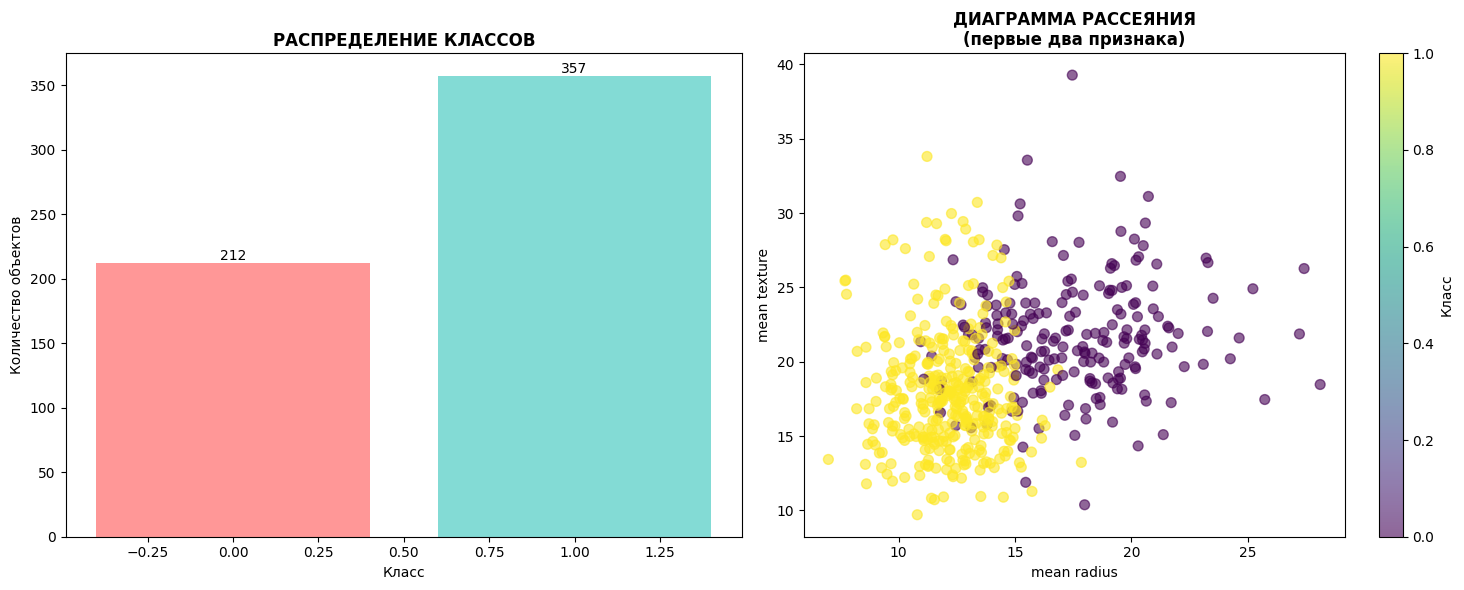


ЗАДАНИЕ 2: ОБУЧЕНИЕ МОДЕЛИ МАШИННОГО ОБУЧЕНИЯ

РАЗДЕЛЕНИЕ ДАННЫХ:
   • Обучающая выборка: 426 объектов
   • Тестовая выборка: 143 объектов

ВЫБРАНА МОДЕЛЬ: Логистическая регрессия

ОБОСНОВАНИЕ ВЫБОРА МОДЕЛИ:
   • [ПРИЧИНА 1: Например, модель хорошо интерпретируется и объяснима]
   • [ПРИЧИНА 2: Быстрое обучение и предсказание]
   • [ПРИЧИНА 3: Хорошо работает на данных этого типа]
   СОВЕТ: Опишите 2-3 конкретные причины выбора этой модели!

ОБУЧЕНИЕ МОДЕЛИ...
   • Модель успешно обучена!

РЕЗУЛЬТАТЫ ОЦЕНКИ:
   • Точность (Accuracy): 0.9860
   • Процент правильных ответов: 98.60%

ДЕТАЛЬНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ:
              precision    recall  f1-score   support

           0     0.9811    0.9811    0.9811        53
           1     0.9889    0.9889    0.9889        90

    accuracy                         0.9860       143
   macro avg     0.9850    0.9850    0.9850       143
weighted avg     0.9860    0.9860    0.9860       143


ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ...


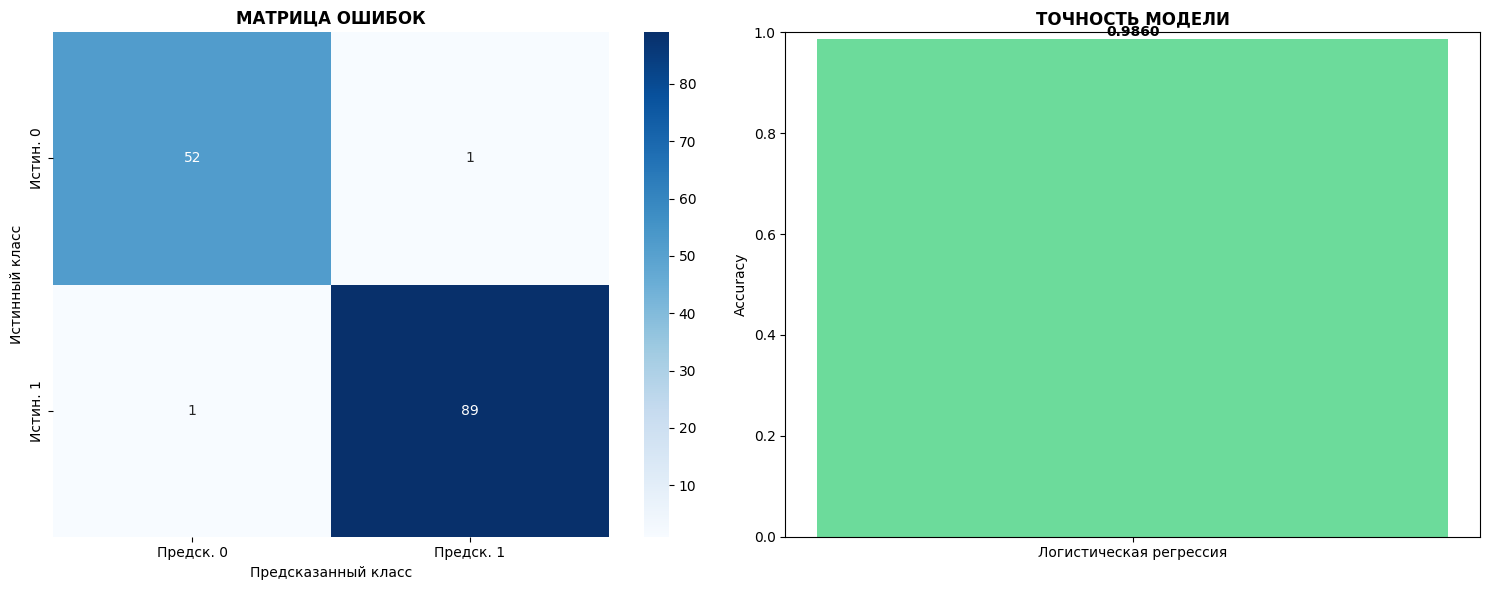


АНАЛИЗ УСПЕШНО ЗАВЕРШЕН!
Итоговая точность модели: 0.9860 (98.60%)
Размер исходных данных: (569, 30)
Использованная модель: Логистическая регрессия
Обучающая выборка: 426 объектов
Тестовая выборка: 143 объектов


In [2]:
import pandas as pd                                                                  # Для работы с таблицами
import numpy as np                                                                   # Для математических операций
import matplotlib.pyplot as plt                                                      # Для графиков
import seaborn as sns                                                                # Для красивых визуализаций
from sklearn.model_selection import train_test_split                                 # Разделение данных
from sklearn.preprocessing import StandardScaler                                     # Нормализация
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Метрики

from sklearn.datasets import load_breast_cancer  # Импорт датасета

# ВЫБОР ДАТАСЕТА
dataset = load_breast_cancer()   # Диагностика рака груди
# dataset = load_iris()          # Ирисы Фишера
# dataset = load_wine()          # Вина

# ПОДГОТОВКА ДАННЫХ
data = dataset
X = pd.DataFrame(data.data, columns=data.feature_names)  # Признаки как таблица
y = pd.Series(data.target, name="target")               # Целевая переменная

# ЗАДАНИЕ 1: ИССЛЕДОВАНИЕ ДАННЫХ
# =============================================================================
print("=" * 60)
print("ЗАДАНИЕ 1: ИССЛЕДОВАНИЕ ДАННЫХ")
print("=" * 60)

# БАЗОВАЯ ИНФОРМАЦИЯ
print("\nОСНОВНАЯ ИНФОРМАЦИЯ:")
print(f"   • Размер данных: {X.shape}")
print(f"   • Количество признаков: {X.shape[1]}")
print(f"   • Количество объектов: {X.shape[0]}")
print(f"   • Примеры признаков: {list(X.columns[:3])}...")

# ИНФОРМАЦИЯ О ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
print(f"\nЦЕЛЕВАЯ ПЕРЕМЕННАЯ:")
print(f"   • Уникальные значения: {np.unique(y)}")
print(f"   • Распределение классов:")
class_distribution = y.value_counts().sort_index()
for class_idx, count in class_distribution.items():
    print(f"     Класс {class_idx}: {count} объектов")

# ПРОВЕРКА КАЧЕСТВА ДАННЫХ
print(f"\nКАЧЕСТВО ДАННЫХ:")
print(f"   • Пропущенные значения: {X.isna().sum().sum()}")
print(f"   • Дубликаты: {X.duplicated().sum()}")

# ВИЗУАЛИЗАЦИЯ ДАННЫХ
print("\nВИЗУАЛИЗАЦИЯ ДАННЫХ...")

# Создаем графики для анализа
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. РАСПРЕДЕЛЕНИЕ КЛАССОВ
class_counts = y.value_counts().sort_index()
bars = axes[0].bar(class_counts.index, class_counts.values,
                   color=['#ff6b6b', '#4ecdc4'], alpha=0.7)
axes[0].set_title('РАСПРЕДЕЛЕНИЕ КЛАССОВ', fontweight='bold')
axes[0].set_xlabel('Класс')
axes[0].set_ylabel('Количество объектов')
# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom')

# 2. ДИАГРАММА РАССЕЯНИЯ (первые два признака)
if X.shape[1] >= 2:
    scatter = axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y,
                             cmap='viridis', alpha=0.6, s=50)
    axes[1].set_title('ДИАГРАММА РАССЕЯНИЯ\n(первые два признака)', fontweight='bold')
    axes[1].set_xlabel(X.columns[0])
    axes[1].set_ylabel(X.columns[1])
    plt.colorbar(scatter, ax=axes[1], label='Класс')

plt.tight_layout()
plt.show()

# ЗАДАНИЕ 2: ОБУЧЕНИЕ МОДЕЛИ
# =============================================================================
print("\n" + "=" * 60)
print("ЗАДАНИЕ 2: ОБУЧЕНИЕ МОДЕЛИ МАШИННОГО ОБУЧЕНИЯ")
print("=" * 60)

# РАЗДЕЛЕНИЕ ДАННЫХ
print("\nРАЗДЕЛЕНИЕ ДАННЫХ:")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print(f"   • Обучающая выборка: {X_train.shape[0]} объектов")
print(f"   • Тестовая выборка: {X_test.shape[0]} объектов")

# ВЫБОР И НАСТРОЙКА МОДЕЛИ (ВЫБЕРИТЕ ОДНУ ИЗ МОДЕЛЕЙ)
# =============================================================================

# Вариант 1: ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("scaler", StandardScaler()),      # Нормализация данных
    ("clf", LogisticRegression(random_state=42, max_iter=1000))  # Основная модель
])
model_name = "Логистическая регрессия"

# Вариант 2: СЛУЧАЙНЫЙ ЛЕС
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model_name = "Случайный лес"

# Вариант 3: K-БЛИЖАЙШИХ СОСЕДЕЙ
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.pipeline import Pipeline
# model = Pipeline([
#     ("scaler", StandardScaler()),
#     ("clf", KNeighborsClassifier(n_neighbors=5))
# ])
# model_name = "K-ближайших соседей"

print(f"\nВЫБРАНА МОДЕЛЬ: {model_name}")

# ОБОСНОВАНИЕ ВЫБОРА МОДЕЛИ (ЗАПОЛНИТЕ САМОСТОЯТЕЛЬНО!)
print(f"\nОБОСНОВАНИЕ ВЫБОРА МОДЕЛИ:")
print("   • [ПРИЧИНА 1: Например, модель хорошо интерпретируется и объяснима]")
print("   • [ПРИЧИНА 2: Быстрое обучение и предсказание]")
print("   • [ПРИЧИНА 3: Хорошо работает на данных этого типа]")
print("   СОВЕТ: Опишите 2-3 конкретные причины выбора этой модели!")

# ОБУЧЕНИЕ МОДЕЛИ
print(f"\nОБУЧЕНИЕ МОДЕЛИ...")
model.fit(X_train, y_train)
print("   • Модель успешно обучена!")

# ПРЕДСКАЗАНИЯ И ОЦЕНКА КАЧЕСТВА
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nРЕЗУЛЬТАТЫ ОЦЕНКИ:")
print(f"   • Точность (Accuracy): {accuracy:.4f}")
print(f"   • Процент правильных ответов: {accuracy*100:.2f}%")

# ДЕТАЛЬНЫЙ ОТЧЕТ
print(f"\nДЕТАЛЬНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ:")
print(classification_report(y_test, y_pred, digits=4))

# ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
print("\nВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ...")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. МАТРИЦА ОШИБОК
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', ax=axes[0], cmap='Blues',
            xticklabels=['Предск. 0', 'Предск. 1'],
            yticklabels=['Истин. 0', 'Истин. 1'])
axes[0].set_title('МАТРИЦА ОШИБОК', fontweight='bold')
axes[0].set_xlabel('Предсказанный класс')
axes[0].set_ylabel('Истинный класс')

# 2. ГРАФИК ТОЧНОСТИ
bars = axes[1].bar([model_name], [accuracy], color=['#2ecc71'], alpha=0.7)
axes[1].set_title('ТОЧНОСТЬ МОДЕЛИ', fontweight='bold')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0, 1)
# Добавляем значение на столбец
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ
# =============================================================================
print("\n" + "=" * 60)
print("АНАЛИЗ УСПЕШНО ЗАВЕРШЕН!")
print("=" * 60)
print(f"Итоговая точность модели: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Размер исходных данных: {X.shape}")
print(f"Использованная модель: {model_name}")
print(f"Обучающая выборка: {X_train.shape[0]} объектов")
print(f"Тестовая выборка: {X_test.shape[0]} объектов")